In [2]:
from google.colab import files
uploaded = files.upload()

Saving tips (data for regression problem).csv to tips (data for regression problem).csv


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


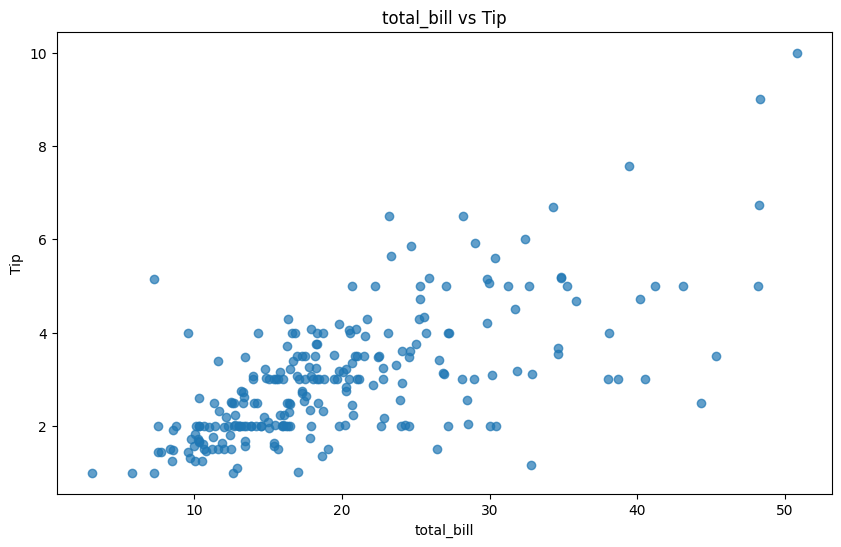

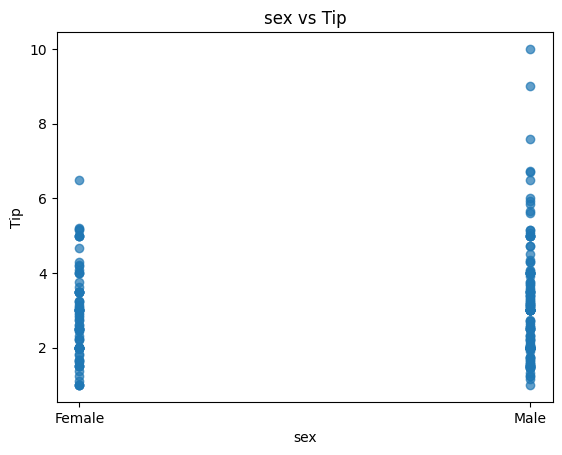

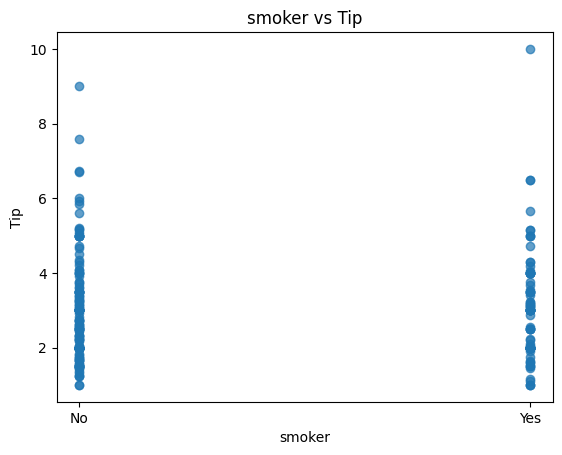

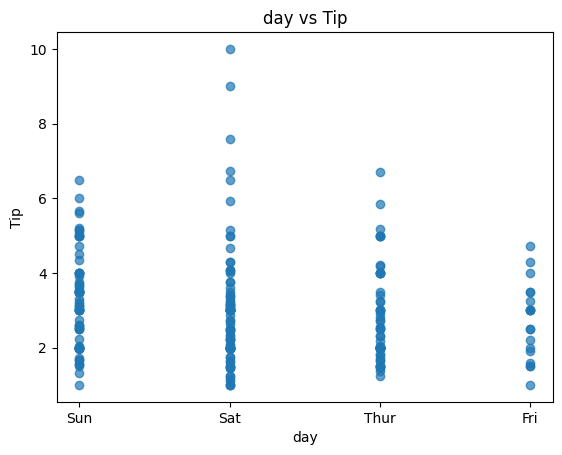

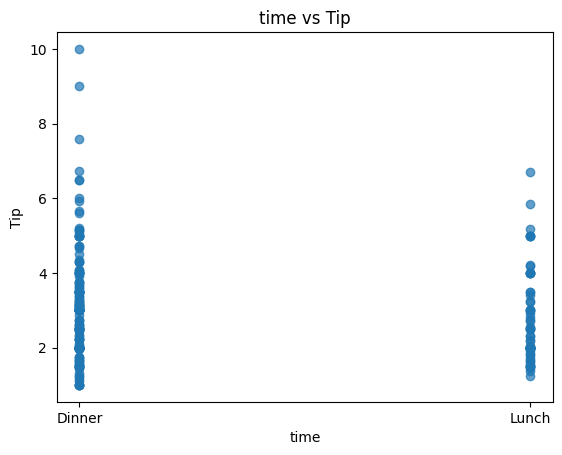

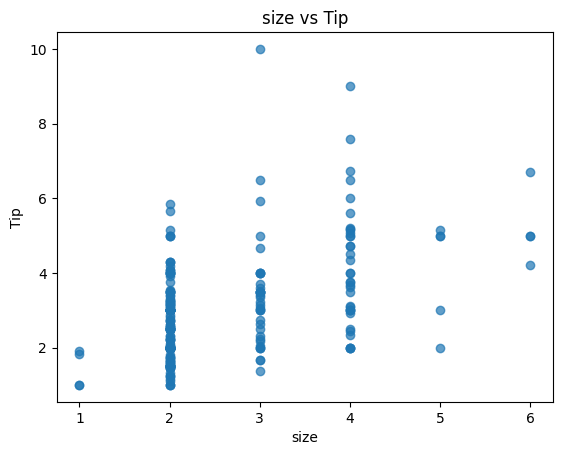

Rainbow Test Statistic: 1.2036274510126597
P-value: 0.15798464222013167


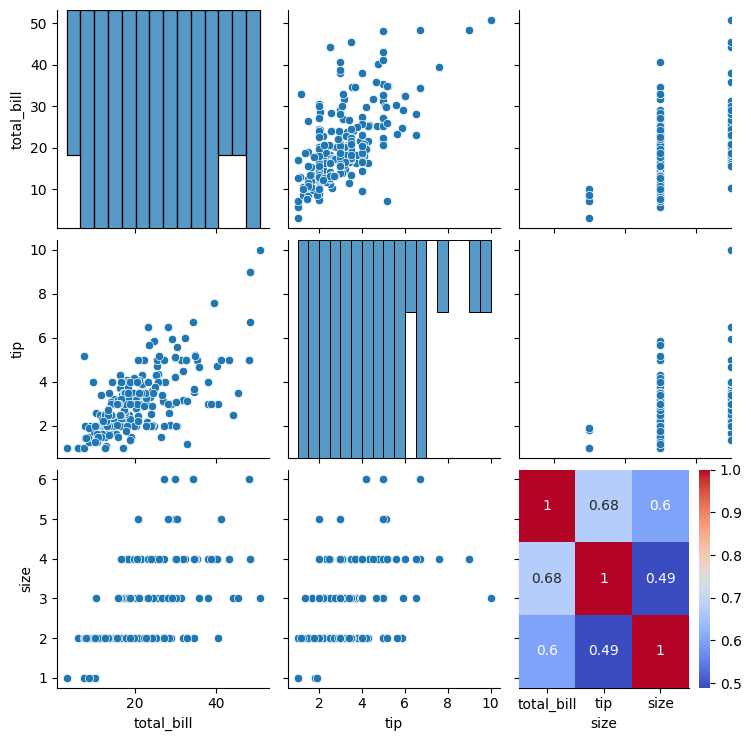

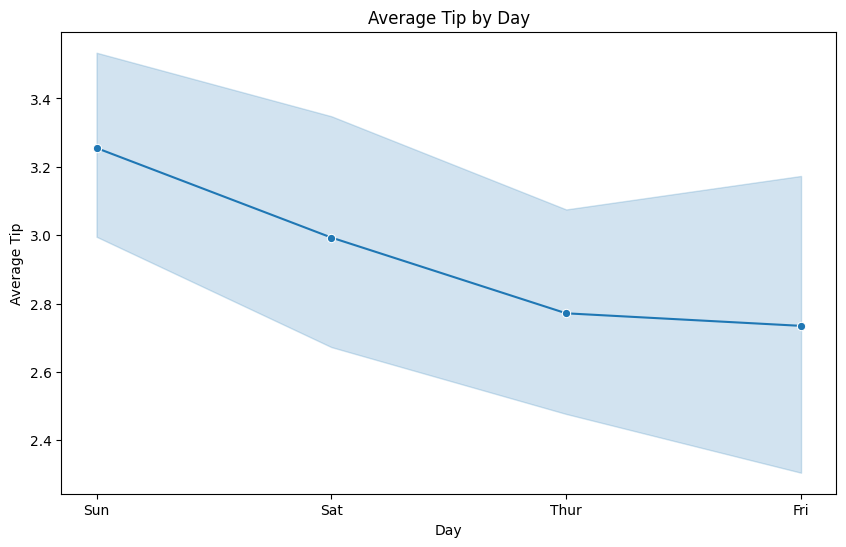

Linear Regression:
 MSE: 0.7033566017436106 
R^2: 0.43730181943482493 
RMSE: 0.8386635807900631
Ridge Regression:
 MSE: 0.7007477213216077 
R^2: 0.4393889716178484 
RMSE: 0.8371067562274287
Lasso Regression:
 MSE: 0.5908528649971524 
R^2: 0.5273068720881755 
RMSE: 0.768669542129225
Decision Tree:
 MSE: 1.2551938775510205 
R^2: -0.004178121600921791 
RMSE: 1.120354353564541
Random Forest:
 MSE: 0.9196720148979602 
R^2: 0.2642455218065466 
RMSE: 0.9589953153680993
SVR:
 MSE: 0.6524534436627769 
R^2: 0.47802527943520123 
RMSE: 0.8077459029068342
KNN:
 MSE: 0.8763725714285714 
R^2: 0.29888587066985495 
RMSE: 0.9361477294896203
Significant factors affecting tips: size          0.108081
total_bill    0.099099
dtype: float64


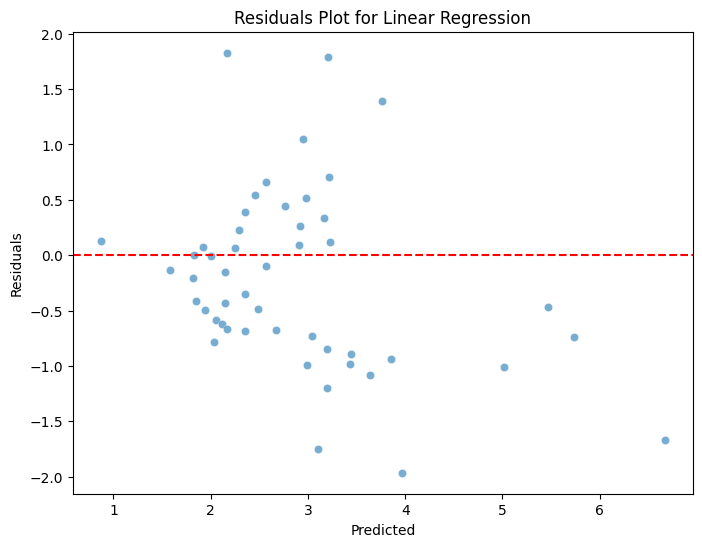

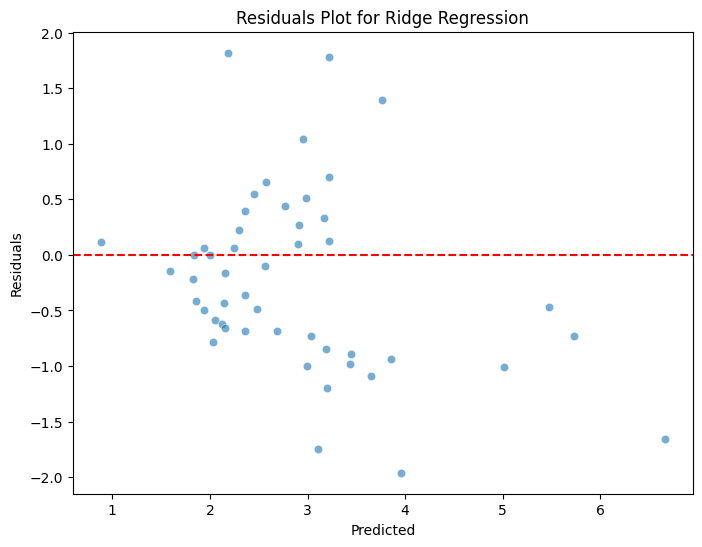

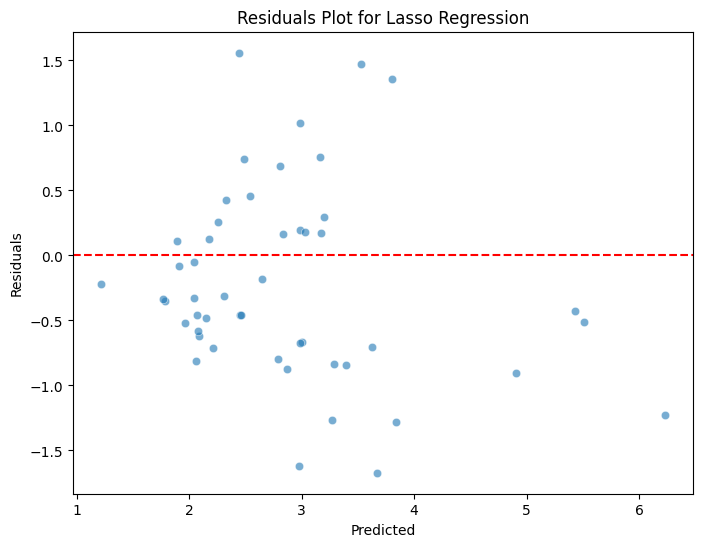

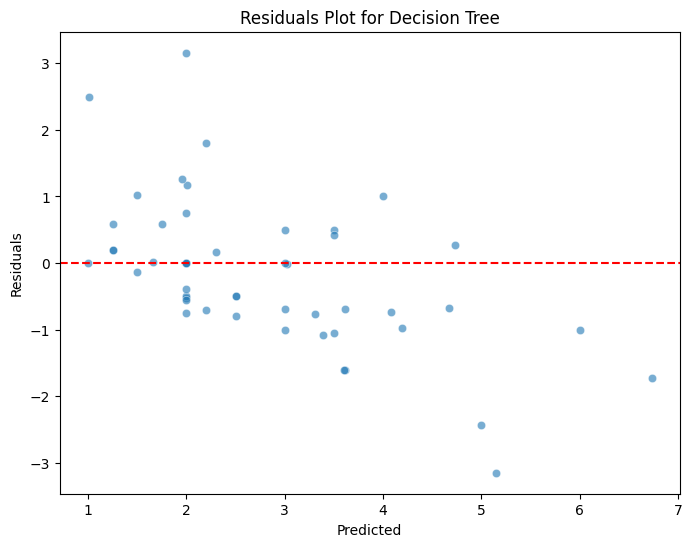

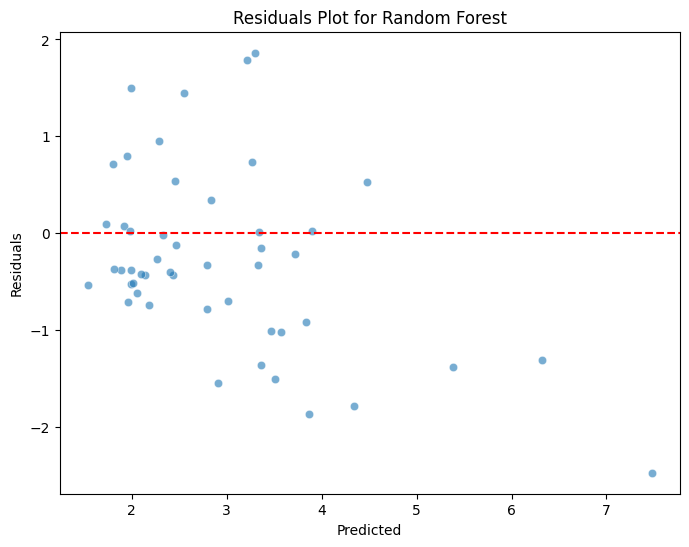

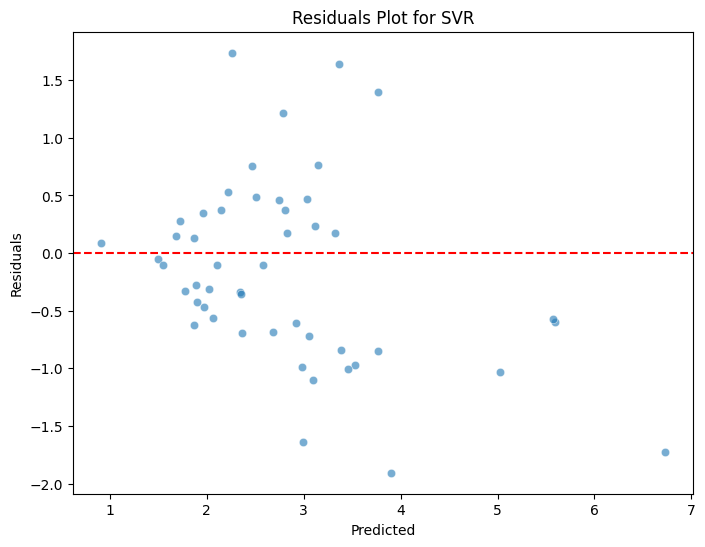

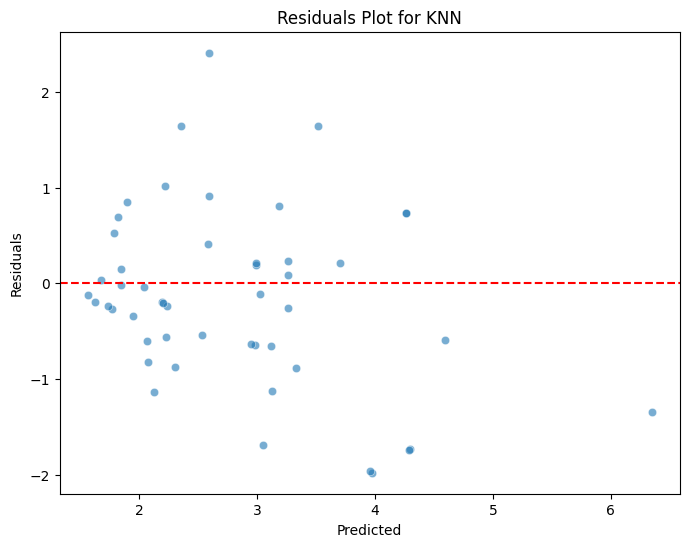

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('tips (data for regression problem).csv')
display(df.head())

# Define target and feature variables
df_data = df.drop(columns=['tip'])
df_target = df['tip']

# Scatter plot of each feature against the target variable 'tip'
plt.figure(figsize=(10, 6))
for i in range(len(df_data.columns)):
    plt.scatter(df_data.iloc[:, i], df_target, alpha=0.7)
    plt.xlabel(df_data.columns[i])
    plt.ylabel('Tip')
    plt.title(f'{df_data.columns[i]} vs Tip')
    plt.show()

# Observations: relationship trends seen in scatter plots
# - High total bill, higher tip; tips vary more on weekends
# - Higher tips during dinner; Men tend to tip more than women on average

# Pairplot for visualizing relationships
sns.pairplot(df)

# Compute correlation matrix among numerical variables
df_corr = df[['total_bill', 'tip', 'size']].copy()
corr = df_corr.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Encode categorical variables for model building
label_encoder = LabelEncoder()
for col in ['sex', 'smoker', 'day', 'time']:
    df_data[col] = label_encoder.fit_transform(df[col])

# Build the linear regression model with statsmodels
import statsmodels.api as sm
X = sm.add_constant(df_data)
y = df_target
model = sm.OLS(y, X).fit()

# Conducting the rainbow test for linearity
from statsmodels.stats.diagnostic import linear_rainbow
rainbow_stat, rainbow_p_value = linear_rainbow(model)
print(f"Rainbow Test Statistic: {rainbow_stat}")
print(f"P-value: {rainbow_p_value}")

# Analysis: high p-value suggests linearity is reasonable for the model

# Average Tip by Day Visualization
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="day", y="tip", estimator="mean", marker="o")
plt.title("Average Tip by Day")
plt.xlabel("Day")
plt.ylabel("Average Tip")
plt.show()

# One-hot encode categorical columns for regression
tips_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)
X = tips_encoded.drop(columns='tip')
y = tips_encoded['tip']

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and evaluate various regression models

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lr = lin_reg.predict(X_test)
print("Linear Regression:\n", "MSE:", mean_squared_error(y_test, y_pred_lr),
      "\nR^2:", r2_score(y_test, y_pred_lr), "\nRMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
print("Ridge Regression:\n", "MSE:", mean_squared_error(y_test, y_pred_ridge),
      "\nR^2:", r2_score(y_test, y_pred_ridge), "\nRMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
print("Lasso Regression:\n", "MSE:", mean_squared_error(y_test, y_pred_lasso),
      "\nR^2:", r2_score(y_test, y_pred_lasso), "\nRMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))

# Decision Tree Regression
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
print("Decision Tree:\n", "MSE:", mean_squared_error(y_test, y_pred_tree),
      "\nR^2:", r2_score(y_test, y_pred_tree), "\nRMSE:", np.sqrt(mean_squared_error(y_test, y_pred_tree)))

# Random Forest Regression
forest = RandomForestRegressor(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)
print("Random Forest:\n", "MSE:", mean_squared_error(y_test, y_pred_forest),
      "\nR^2:", r2_score(y_test, y_pred_forest), "\nRMSE:", np.sqrt(mean_squared_error(y_test, y_pred_forest)))

# Support Vector Regression
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)
print("SVR:\n", "MSE:", mean_squared_error(y_test, y_pred_svr),
      "\nR^2:", r2_score(y_test, y_pred_svr), "\nRMSE:", np.sqrt(mean_squared_error(y_test, y_pred_svr)))

# K-Nearest Neighbors Regression
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN:\n", "MSE:", mean_squared_error(y_test, y_pred_knn),
      "\nR^2:", r2_score(y_test, y_pred_knn), "\nRMSE:", np.sqrt(mean_squared_error(y_test, y_pred_knn)))

# Lasso Coefficients for feature importance
lasso_importance = pd.Series(lasso.coef_, index=X.columns).sort_values(ascending=False)
print("Significant factors affecting tips:", lasso_importance[lasso_importance != 0])

# Function to plot residuals for each model
def plot_residuals(y_actual, y_predicted, title):
    residuals = y_actual - y_predicted
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_predicted, y=residuals, alpha=0.6)
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f'Residuals Plot for {title}')
    plt.xlabel("Predicted")
    plt.ylabel("Residuals")
    plt.show()

# Residual plots
plot_residuals(y_test, y_pred_lr, "Linear Regression")
plot_residuals(y_test, y_pred_ridge, "Ridge Regression")
plot_residuals(y_test, y_pred_lasso, "Lasso Regression")
plot_residuals(y_test, y_pred_tree, "Decision Tree")
plot_residuals(y_test, y_pred_forest, "Random Forest")
plot_residuals(y_test, y_pred_svr, "SVR")
plot_residuals(y_test, y_pred_knn, "KNN")

# Conclusion and business recommendations
#The business should prioritize providing top-notch service to customers on Sundays, and also enhance service quality on Fridays to potentially increase tip rates on those days.
#Emphasizing exceptional service during dinner hours could help drive higher tip amounts.
#Tables with larger groups should receive additional attention, as they tend to tip more generously.
#Focusing on increasing the total bill can be beneficial, given its strong correlation with tip amounts.
